In [13]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

train_df = pd.read_csv('./titanic/train.csv')

print(train_df.isna().sum())
print(train_df.info()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

In [14]:
train_df['Embarked'] = pd.Categorical(train_df['Embarked'], categories=['S', 'Q', 'C', 'Unknown'], ordered=False)
train_df['Embarked'] = train_df['Embarked'].fillna('Unknown')
train_df['Sex'] = pd.Categorical(train_df['Sex'], categories=['male', 'female'], ordered=False)
train_df['Pclass'] = pd.Categorical(train_df['Pclass'], categories=[3, 2, 1], ordered=True)


C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_19592\1789727745.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_sex = train_df.groupby('Sex')['Pclass'].value_counts().reset_index()
C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_19592\1789727745.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_embarked = train_df.groupby('Embarked')['Pclass'].value_counts().reset_index()


Embarked
S          0.722783
C          0.188552
Q          0.086420
Unknown    0.002245
Name: proportion, dtype: float64


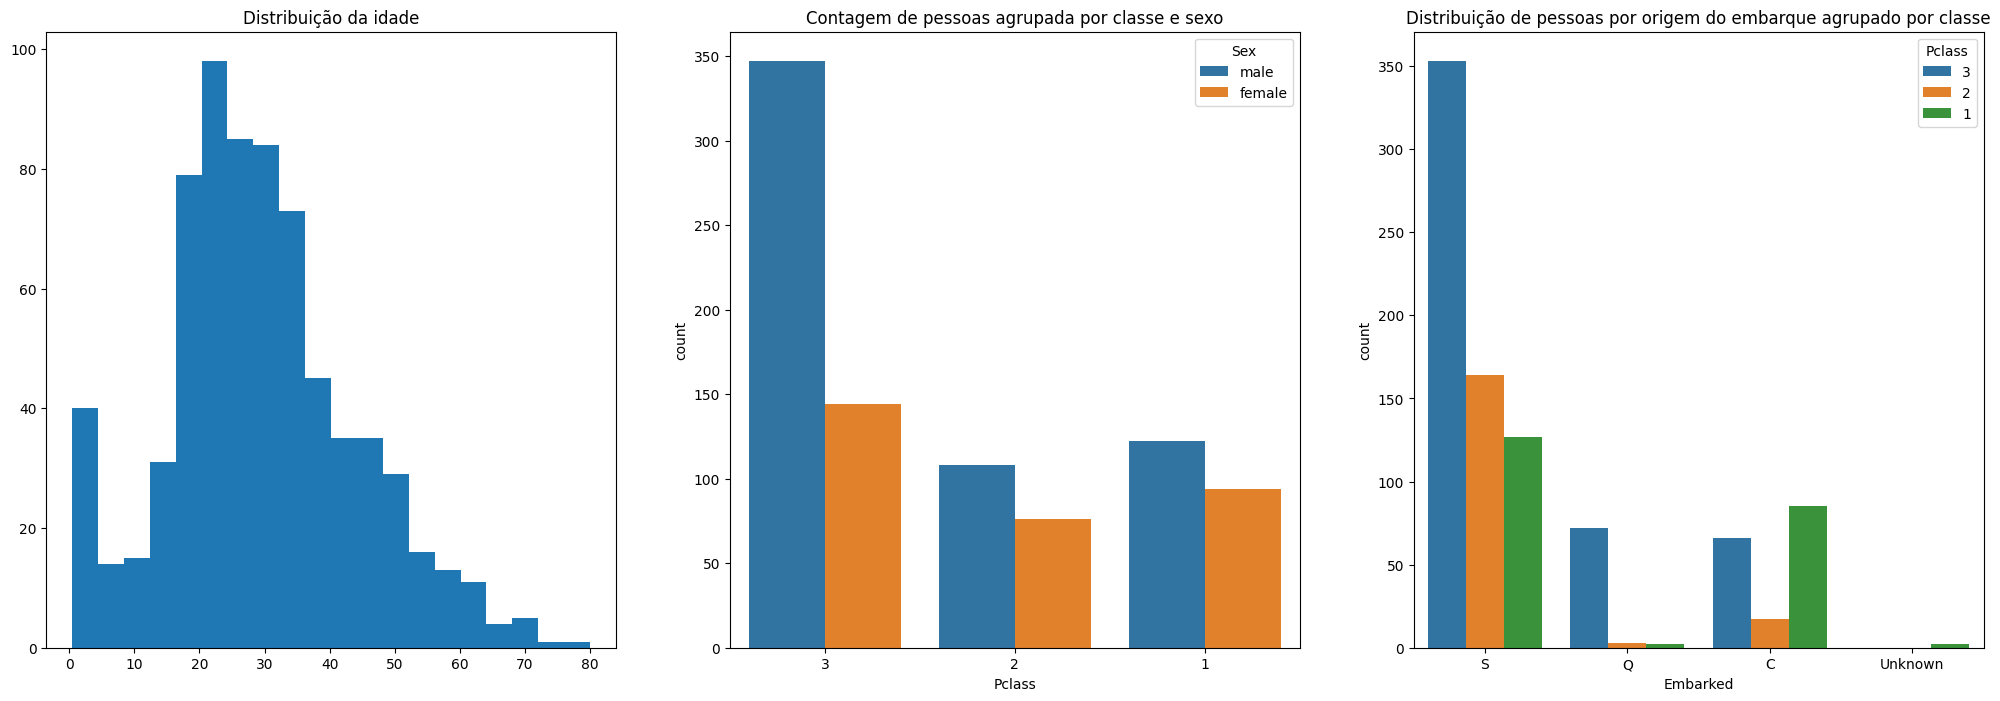

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#Idade, Pclass, Sex, Fare, Embarked 

# Mais pessoas embarcadas entre 20 e 30 anos.
# Aproximadamente 2x mais pessoas embarcadas na terceira classe do que na primeira e segunda classe.
# A proporção entre homens e mulheres na terceira classe é aproximadamente de 2x homens, em comparação com as outras classes que é mais equilibrado.
# 70% das pessoas embarcaram em Southampton

fig, axes = plt.subplots(1, 3, figsize=(25, 8))

train_df['Age'].hist(bins=20, ax=axes[0], grid=False)
axes[0].set_title('Distribuição da idade')

grouped_by_sex = train_df.groupby('Sex')['Pclass'].value_counts().reset_index()
sns.barplot(
    data=grouped_by_sex,
    x='Pclass', y='count',
    hue='Sex', ax=axes[1]
)
axes[1].set_title('Contagem de pessoas agrupada por classe e sexo')

# train_df['Embarked'].value_counts().plot(kind='bar', ax=axes[0][2])
# axes[0][2].set_title('Distribuição de pessoas por origem do embarque')
print(train_df['Embarked'].value_counts(normalize=True))

grouped_by_embarked = train_df.groupby('Embarked')['Pclass'].value_counts().reset_index()
embarked_class = sns.barplot(
    data=grouped_by_embarked,
    x='Embarked', y='count',
    hue='Pclass', ax=axes[2]
)
axes[2].set_title('Distribuição de pessoas por origem do embarque agrupado por classe')
plt.show()

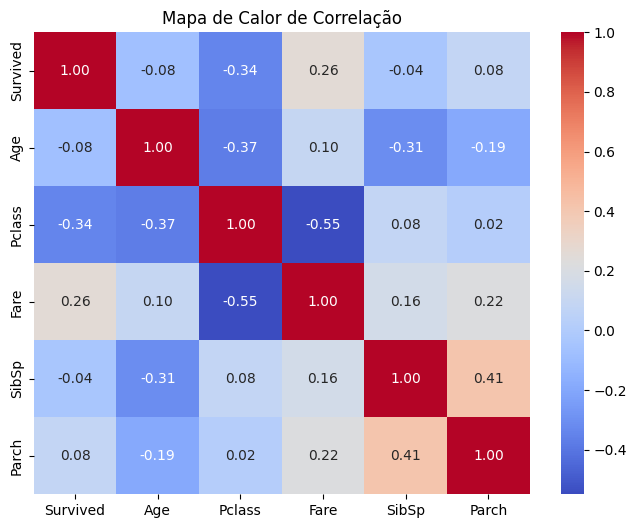

In [16]:
# Sex, Cabin, Embarked e Ticket foram removidos da matriz de correlação por serem categóricas.

# Aqui podemos ver que a maior correlação é a Pclass e Fare, ambas trazem um sentido econômico para a relação com a sobrevivência.

train_df_dummy = pd.get_dummies(train_df, columns=['Sex', 'Cabin', 'Embarked',  'Ticket'], drop_first=True)

matrix_corr = train_df_dummy[['Survived', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlação')
plt.show()


In [17]:
# Trabalhando com a variável Cabin, que é categórica.

train_df['Has_Cabin'] = np.where(train_df['Cabin'].notna(), 1, 0)
train_df['Deck'] = train_df['Cabin'].str[0].fillna('UNK')

  Deck        Fare
0    A   39.623887
1    B  113.505764
2    C  100.151341
3    D   57.244576
4    E   46.026694
5    F   18.696792
6    G   13.581250
7    T   35.500000
8  UNK   19.157325


C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_19592\2599723594.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.barplot(


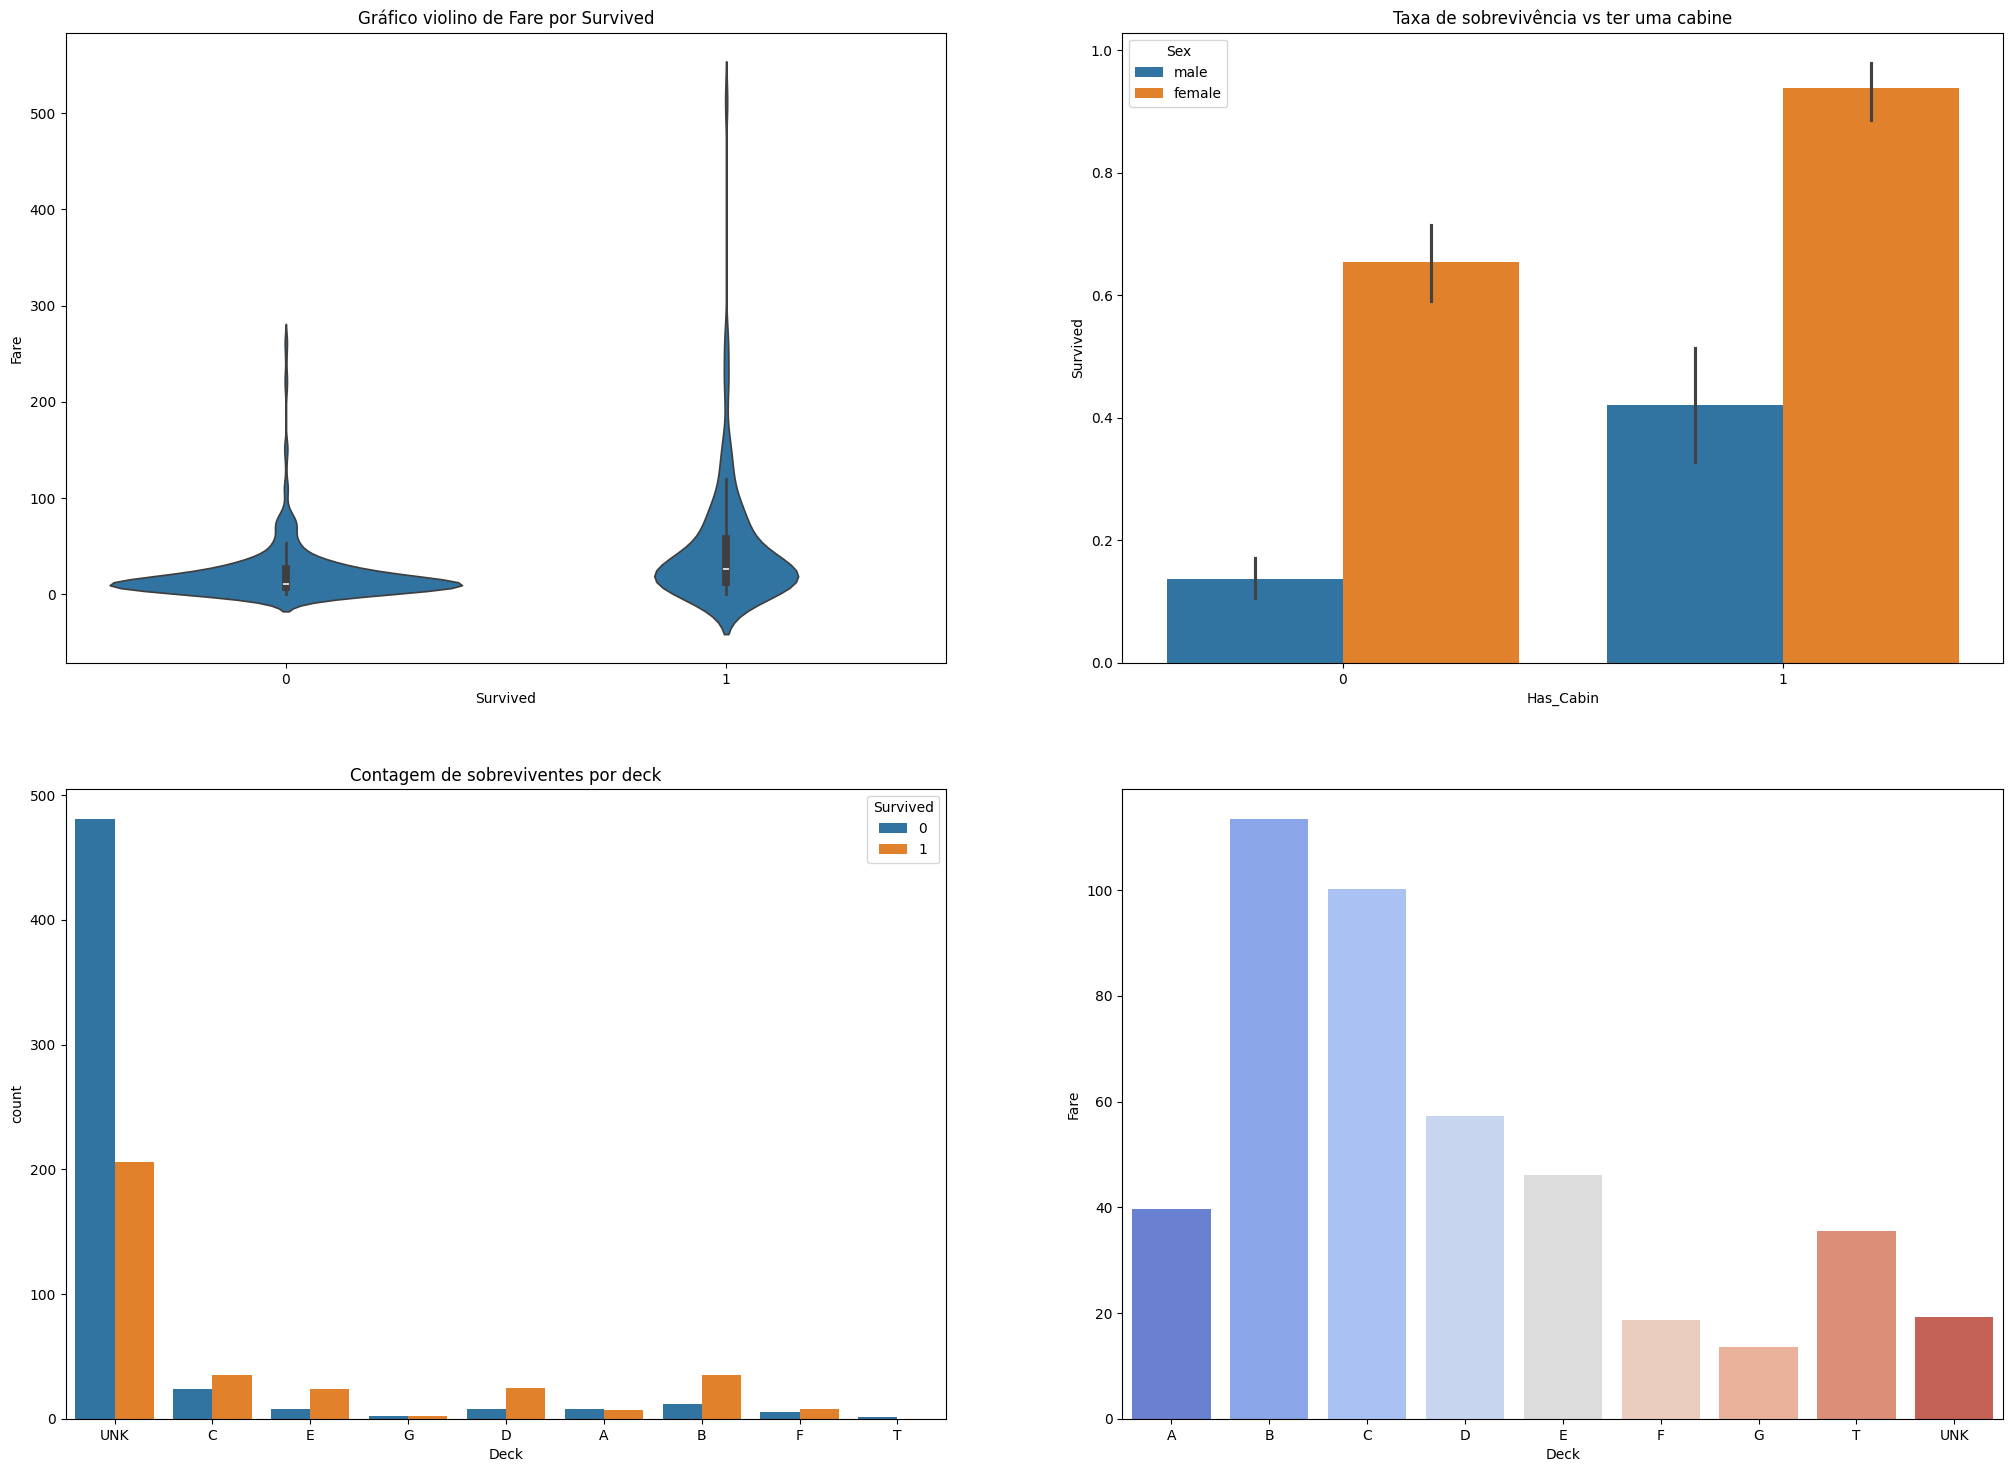

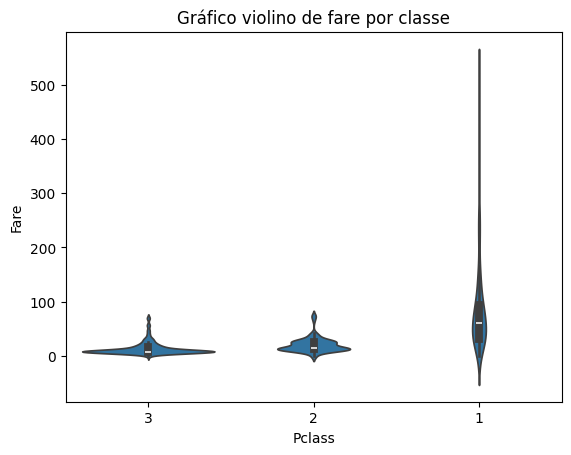

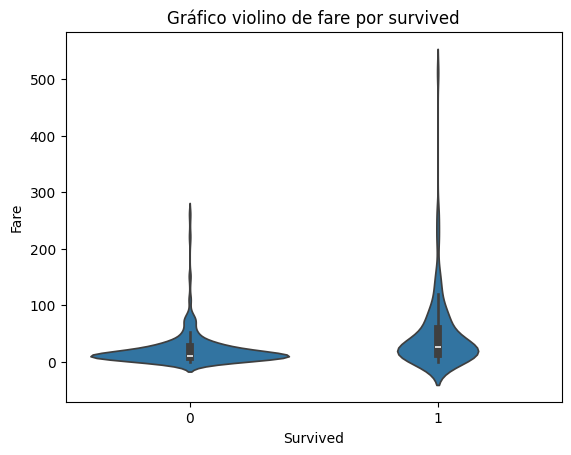

In [18]:
# Na matriz de correlação a gente viu que Fare e Pclass foram as que tiveram maior correlação com survived. 
# Então vamos explorar essas duas variáveis.

# 1.
# A partir do violinplot conseguimos ver que para os sobreviventes a Fare (tarifa) da passagem é muito mais esparsa, e também alcança valores mais altos
# Enquanto podemos ver que a concentração de pessoas que não sobreviveram é muito maior para os valores entre 0 e 100 de Fare

# 2.
# A taxa de sobrevivência das mulheres é aproximadamente mais que o dobro das dos homens
# Isso mostra uma política de preocupação com a segurança das mulheres a bordo.

# 3.
# Visualização da contagem de sobreviventes por Deck, extraído da Cabin


fig, axes = plt.subplots(2, 2, figsize=(25, 18))

sns.violinplot(x='Survived', y='Fare', data=train_df, ax=axes[0][0])
axes[0][0].set_title('Gráfico violino de Fare por Survived')

sns.barplot(
    data=train_df, x='Has_Cabin', y='Survived', hue='Sex',
    ax=axes[0][1]
)
axes[0][1].set_title('Taxa de sobrevivência vs ter uma cabine')

sns.countplot(
    data=train_df, x='Deck', hue='Survived', ax=axes[1][0]
)
axes[1][0].set_title('Contagem de sobreviventes por deck')

mean_fare_by_deck = train_df.groupby('Deck')['Fare'].mean().reset_index()
print(mean_fare_by_deck)
 
sns.barplot(
    data=mean_fare_by_deck,
    x='Deck', y='Fare', ci=True,
    ax=axes[1][1],
    hue='Deck', palette='coolwarm'
)

plt.show()

vio = sns.violinplot(x='Pclass', y='Fare', data=train_df)
vio.set_title('Gráfico violino de fare por classe')
plt.show()

ab = sns.violinplot(x='Survived', y='Fare', data=train_df)
ab.set_title('Gráfico violino de fare por survived')
plt.show()



In [19]:
# Preprocessando valores manualmente com Pandas

train_df['Age'] = train_df['Age'].fillna(train_df.groupby('Pclass')['Age'].transform('mean'))

print(train_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Has_Cabin        0
Deck             0
dtype: int64


C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_19592\2019055639.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'] = train_df['Age'].fillna(train_df.groupby('Pclass')['Age'].transform('mean'))


In [88]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC


In [ ]:
num_var = ['Age', 'Fare', 'SibSp', 'Pclass', 'Parch', 'Has_Cabin']
cat_var = ['Sex', 'Embarked', 'Deck', 'Ticket']

X = train_df[num_var+cat_var]
y = train_df['Survived']



num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_var),
    ('cat', cat_pipeline, cat_var)
])

Melhor acurácia:
0.8246268656716418
Melhor F1-Score:
0.7707317073170732
Melhor n_neighbors: 7


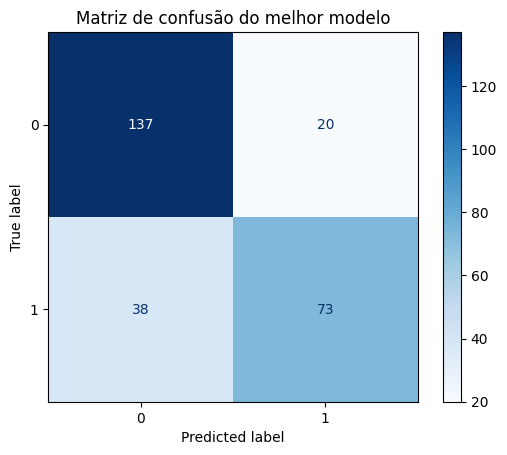

In [104]:
# Basemodel simples com KNN 

scores = {}
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, 
)
for i in range(1, 16):
    
    model = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('model', KNeighborsClassifier(n_neighbors=i, n_jobs=4))
        ]
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    scores[i] = { 'accuracy': accuracy, 'f1': f_score}

best_model = max(scores.items(), key=lambda x: x[1]['accuracy'])
print('Melhor acurácia:')
print(best_model[1]['accuracy'])
print('Melhor F1-Score:')
print(best_model[1]['f1'])
print('Melhor n_neighbors:', best_model[0])

cm = confusion_matrix(y_test, y_pred)

cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot(cmap='Blues')
plt.title('Matriz de confusão do melhor modelo')
plt.show()



In [124]:
# Base model com RandomSearch

param_dist = {
    'model__n_neighbors': list(range(3, 19)),
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'brute'],
    'model__leaf_size': [ 10, 20, 30, 40, 50, 60, 70, 80],
    'model__p': [1, 2],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, 
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', KNeighborsClassifier(n_jobs=4))
    ]
)

random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=20,
    cv=5, 
    scoring='accuracy',
    random_state=42, n_jobs=4
)
random_search.fit(X_train, y_train)

best_estimator = random_search.best_estimator_
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Melhor acurácia:')
print(accuracy)
print('Melhor F1-Score:')
print(f1)

Melhor acurácia:
0.8022388059701493
Melhor F1-Score:
0.7309644670050761


In [127]:
# Base model com RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
random_forest = RandomForestClassifier(n_jobs=4, random_state=42)
pipeline = Pipeline(
    steps=[
        ('preprocesor', preprocessor),
        ('random_forest',random_forest )
    ]
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Melhor acurácia:')
print(accuracy)
print('Melhor F1-Score:')
print(f1)

Melhor acurácia:
0.7910447761194029
Melhor F1-Score:
0.7307692307692307


In [99]:

param_dist = {
    'random_forest__n_estimators': [50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
    'random_forest__max_depth': [None, 10, 15, 20,25, 30, 35,40, 45,50,55, 60,65,70],
    'random_forest__min_samples_split': [2, 5, 7, 10, 15, 20,25,30],
    'random_forest__min_samples_leaf': [1, 2, 4,6,8,10],
    'random_forest__max_features': [None, 'sqrt', 'log2'],
    'random_forest__criterion': ['gini', 'entropy', 'log_loss']
}

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('random_forest', RandomForestClassifier(random_state=42, n_jobs=4))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist,
    n_iter=10, cv=5, scoring={'accuracy': 'accuracy', 'f1': 'f1'}, n_jobs=4,
    random_state=42, refit='accuracy'
)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Melhor acurácia:')
print(accuracy)
print('Melhor F1-Score:')
print(f1)

Melhor acurácia:
0.8059701492537313
Melhor F1-Score:
0.7475728155339806


In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(max_iter=1000))
    ]
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc)
print(f1)

0.8208955223880597
0.7714285714285715


In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

param_dist = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.linspace(0.001, 100, 100),
    'classifier__solver': ['liblinear', 'saga']
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Melhores hiperparâmetros:", random_search.best_params_)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Melhores hiperparâmetros: {'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__C': np.float64(52.52572727272727)}
Acurácia: 0.8208955223880597

Matriz de Confusão:
 [[139  18]
 [ 30  81]]


e:\Desenvolvimento\Orion\Desafio-2\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [52]:
param_dist = {
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__max_depth': list(range(3, 20)),
    'model__min_samples_split': list(range(2, 10)),
    'model__min_samples_leaf': list(range(1, 10)),
    'model__max_features': [None, 'sqrt', 'log2']
}

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
random_search = RandomizedSearchCV(
    model_pipeline,
    param_distributions=param_dist,
    n_iter=500, 
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=4
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Melhores hiperparâmetros:")
print(random_search.best_params_)
print("\nAcurácia:", accuracy_score(y_test, y_pred))

Melhores hiperparâmetros:
{'model__min_samples_split': 6, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': 8, 'model__criterion': 'gini'}

Acurácia: 0.7761194029850746


In [111]:
pip = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1, gamma='scale', probability=True))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

pip.fit(X_train, y_train)
y_pred = pip.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.8246268656716418
